# Resavanje keplerove jednacine u polju kompleksnih brojeva

In [2]:
import cmath
import numpy as np
import matplotlib.pyplot as plt
import astropy as ap
import pandas as pd
import seaborn as sns

## F^1

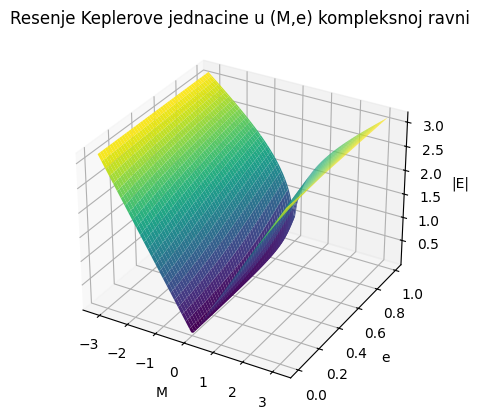

In [26]:
def keplerova_jednacina(e,M,max_iter=100,greska=1e-10):
    E = M

    def jednacina(E):
        return E - e * np.sin(E) - M

    def izvod(E):
        return 1 - e * np.cos(E)

    for _ in range(max_iter):
        x = jednacina(E)/izvod(E)
        E = E - x

        if abs(x) < greska:
                return E

    return E

#tablica
# (-pi,pi) i (0,1)(|e|<1) 100 vrednosti
M_osa = np.linspace(-np.pi,np.pi, 100)
e_osa = np.linspace(0,0.99,100)

M,e = np.meshgrid (M_osa, e_osa)

#racunamo E na svim tackama ravni
E_osa = np.empty((len(M_osa),len(e_osa)),dtype=np.complex64)
e_duzina = len(e_osa)
M_duzina = len(M_osa)
for i in range(e_duzina):
    for j in range(M_duzina):
        E = keplerova_jednacina(e[i,j],M[i,j])
        if E != None:
            E_osa[i,j] = E
        else:
            print('greska')
            np.nan

#crtanje grafika
grafik = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(M,e, np.abs(E_osa), cmap = 'viridis')

ax.set_xlabel('M')
ax.set_ylabel('e')
ax.set_zlabel('|E|')
ax.set_title('Resenje Keplerove jednacine u (M,e) kompleksnoj ravni')

plt.show()

/var/folders/8f/2_cq99696hl7q06d99f_j9wm0000gn/T/ipykernel_39674/2458459375.py:11: RuntimeWarning: divide by zero encountered in divide
  x = jednacina(E)/izvod(E)
/var/folders/8f/2_cq99696hl7q06d99f_j9wm0000gn/T/ipykernel_39674/2458459375.py:5: RuntimeWarning: invalid value encountered in sin
  return (M + e* np.sin(E))
/var/folders/8f/2_cq99696hl7q06d99f_j9wm0000gn/T/ipykernel_39674/2458459375.py:8: RuntimeWarning: invalid value encountered in cos
  return (e * np.cos(E))


ValueError: x and y can be no greater than 2D, but have shapes (100,) and (100, 100, 100)

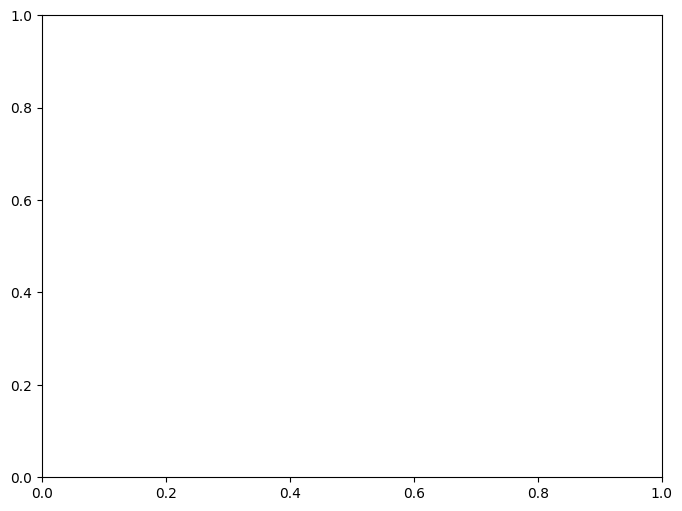

In [27]:
def keplerova_jednacina(M,e):
    E = 0

    def jednacina(E):
        return (M + e* np.sin(E))

    def izvod(E):
        return (e * np.cos(E))

    for i in range(16):
        x = jednacina(E)/izvod(E)
        E = E - x

    return E

M_osa = np.linspace(-4,4,100)
e_osa = np.linspace(-3,3,100)


E_mat = np.empty((len(M_osa),len(e_osa),100))
e_duzina = len(e_osa)
M_duzina = len(M_osa)

for i in range(e_duzina):
    for j in range(M_duzina):
        E = keplerova_jednacina(M[j],e[i])
        E_mat[i][j] = E

M,e = np.meshgrid(M_osa,e_osa)

M_ticks = list(range(-4,4))
e_ticks = list(range(-3,3))

plt.figure(figsize=(8, 6))
plt.plot(M_osa,e_osa,E_mat)
plt.xticks(M_ticks,[f"{x}" for x in M_ticks])
plt.yticks(e_ticks,[f"{x}" for x in e_ticks])
plt.xlim(-4, 4)
plt.ylim(-4, 4)

plt.title('Keplerova jednacina')
plt.xlabel('M')
plt.ylabel('e')
plt.show()

counturef

## F\^2

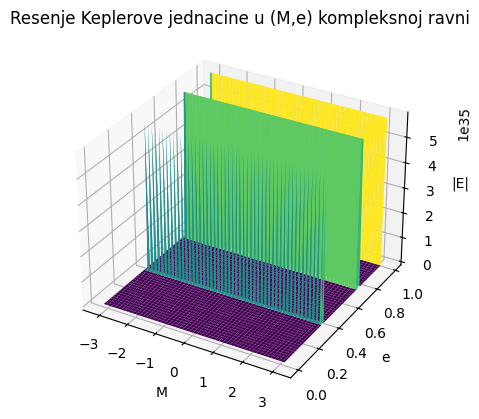

In [55]:
def keplerova_jednacina(e,M,max_iter=100,greska=1e-10):
    E = M

    def jednacina(E):
        return (E - e * np.sin(E) - M)*(E - e * np.sin(E) - M)

    def izvod(E):
        return 2*E - 2*E*e*np.cos(E) - 2*np.sin(E)+2*e*np.sin(E)*np.cos(E)
    
    for _ in range(max_iter):
        x = jednacina(E)/izvod(E)
        E = E - x

        if abs(x) < greska:
                return E

    return None

#tablica
# (-pi,pi) i (0,1)(|e|<1) 100 vrednosti
M_osa = np.linspace(-np.pi,np.pi, 100)
e_osa = np.linspace(0,0.99,100)

M,e = np.meshgrid (M_osa, e_osa)

#racunamo E na svim tackama ravni
E_osa = np.empty_like(M, dtype=np.complex64)
e_duzina = len(e_osa)
M_duzina = len(M_osa)
for i in range(e_duzina):
    for j in range(M_duzina):
        E = keplerova_jednacina(e[i,j],M[i,j])
        if E != None:
            E_osa[i,j] = E
        else:
            np.nan
            break

#crtanje grafika
grafik = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(M,e, (E_osa), cmap = 'viridis')

ax.set_xlabel('M')
ax.set_ylabel('e')
ax.set_zlabel('|E|')
ax.set_title('Resenje Keplerove jednacine u (M,e) kompleksnoj ravni')

plt.show()